In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#making corpus or words from comments
import re
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [43]:
dataset = pd.read_csv('./darazromanUrduReviews/darazreviews.csv',encoding='utf-8')

In [44]:
datareview = dataset[['Reviews','Sentiment']]

In [45]:
dataset.head()

,Unnamed: 0,Product_ID,Customer_Name,Customer_ID,Date,Rating,Spam(1) and Not Spam(0),Reviews,Sentiment,Features,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,11/9/2019,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],NaN,NaN,NaN,NaN,NaN,NaN
1,1,MI543EL02ACXSNAFAMZ,Afridi,396,11/21/2016,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",NaN,NaN,NaN,NaN,NaN,NaN
2,2,MI543EL02ACXSNAFAMZ,Muhammed,3710,10/22/2018,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",NaN,NaN,NaN,NaN,NaN,NaN
3,3,TE111EL1KXNGWNAFAMZ,Ghazanfar,1860,10/6/2017,3,0,back cover acha hai sai cuts hai aur soft b ha...,Positive,"['back', 'cover', 'cuts', 'soft', 'protector',...",NaN,NaN,NaN,NaN,NaN,NaN
4,4,SO638EL103OUWNAFAMZ,Murtaza iqbal,3778,8/31/2017,4,0,shru may may thumb grip k khalif thi kyu k ext...,Negative,"['thumb', 'grip', 'chezy', 'stock', 'controlle...",NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
datareview.head()

,Reviews,Sentiment
0,mil gya hai acha hai aur toota howa b nai hai,Positive
1,aram sy pocket may aa jta hai aur quality b ac...,Positive
2,sb sy achi chez apki customer service bhot ach...,Positive
3,back cover acha hai sai cuts hai aur soft b ha...,Positive
4,shru may may thumb grip k khalif thi kyu k ext...,Negative


In [57]:
datareview[datareview['Sentiment'] == 'Positive'].shape[0]

2372

visualizing the proportion in which text is available with respect to sentiment

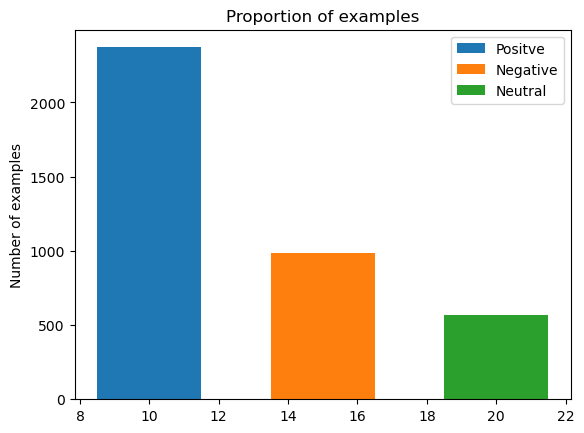

In [52]:
Pos = datareview[datareview['Sentiment'] == 'Positive'].shape[0]
Neg = datareview[datareview['Sentiment'] == 'Negative'].shape[0]
Neu = datareview[datareview['Sentiment'] == 'Neutral'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

Above figure shows number of texts for each category of sentiment

y is in form of categorical data so we need to convert it into quantitative data using label encoder

In [53]:
# label selection
y=datareview.iloc[:,1].values
labelEnocder_y=LabelEncoder()
y=labelEnocder_y.fit_transform(y)
# 2 postive 0 negative 1 nuetral

In [62]:
corpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(0,3923):
    review = re.sub('[^a-zA-Z]',' ',datareview.iloc[:,0].values[i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stopwords]
    review=' '.join(review)
    corpus.append(review)

making matrix of most common words with countVectorizer it is used to make vocabulary 

In [63]:
# making matrix of most common words with countVectorizer it is used to make vocabulary   
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()

spliting dataset into train and test set

In [64]:
#spliting dataset into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In Cell below we have created logistic regression classifier used 80% of data for training 20% for testing created 
confusion matrix printed it and visualized as well

Confusion Matrix
[[116  13  54]
 [ 15  49  47]
 [ 30  23 438]]


C:\Users\azhar\AppData\Local\Temp\ipykernel_12804\2848673302.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\azhar\AppData\Local\Temp\ipykernel_12804\2848673302.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


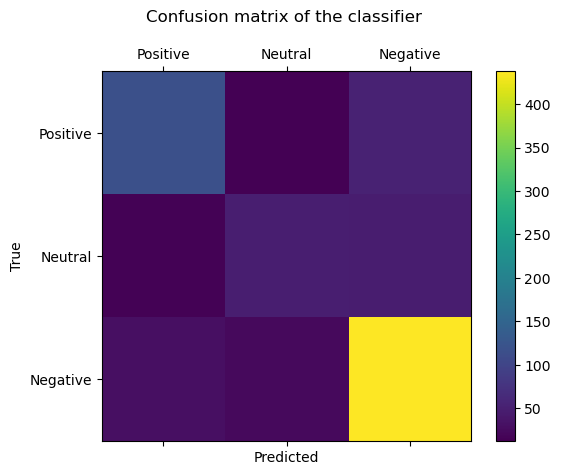

Accuracy is 0.7681528662420383 


In [65]:
classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))